Download the followings in your prompt if you are using local environment

In [ ]:
pip install datasets


In [ ]:
!pip install huggingface_hub datasets


In [4]:
from huggingface_hub import hf_hub_download
from huggingface_hub import login

login()

import json



In [ ]:
!git clone https://huggingface.co/datasets/kdave/Indian_Financial_News


If the git clone block doesnt work, use this one

In [5]:
from datasets import load_dataset

dataset = load_dataset("kdave/Indian_Financial_News")

In [ ]:
import pandas as pd
from datasets import Dataset

df = pd.read_csv("Indian_Financial_News/training_data_26000.csv")
print(df.columns)


Run this one if imported from dataset instead of git clone

In [6]:
import pandas as pd

df = dataset["train"].to_pandas()
print(df.columns)
print(df.head())

Index(['URL', 'Content', 'Summary', 'Sentiment'], dtype='object')
                                                 URL  \
0  https://www.moneycontrol.com/news/business/eco...   
1  https://www.businesstoday.in/top-story/state-r...   
2  https://www.financialexpress.com/economy/covid...   
3  https://www.moneycontrol.com/news/business/mar...   
4  https://www.financialexpress.com/industry/six-...   

                                             Content  \
0  US consumer spending dropped by a record in Ap...   
1  State-run lenders require an urgent Rs 1.2 tri...   
2  Apparel exporters on Wednesday urged the gover...   
3  Asian shares battled to extend a global reboun...   
4  After India’s sovereign credit rating fell to ...   

                                             Summary Sentiment  
0  consumer spending plunges 13.6 percent in Apri...  Negative  
1  government will have to take a bulk of the tab...  Negative  
2  exporters are facing issues in terms of raw ma...  Negative  


In [8]:
from datasets import Dataset

ds = Dataset.from_pandas(df)
print(ds[0])


{'URL': 'https://www.moneycontrol.com/news/business/economy/covid-19-pandemic-us-consumer-spending-tumble-in-april-5334861.html', 'Content': 'US consumer spending dropped by a record in April as the COVID-19 pandemic undercut demand, buttressing expectations that the economy could contract in the second quarter at its steepest pace since the Great Depression.\n\nThe Commerce Department said on Friday consumer spending, which accounts for more than two-thirds of U.S. economic activity, plunged 13.6 percent last month. That was the biggest drop since the government started tracking series in 1959, and followed a 6.9 percent tumble in March.\n\nEconomists polled by Reuters had forecast consumer spending plummeting 12.6 percent in April.\n\nFollow our full coverage of the coronavirus pandemic here.', 'Summary': 'consumer spending plunges 13.6 percent in April. that was the biggest drop since the government started tracking series in 1959. consumer spending accounts for more than two-thirds

In [9]:
print("Number of records:", len(ds))
print("Columns:", ds.column_names)


Number of records: 26961
Columns: ['URL', 'Content', 'Summary', 'Sentiment']


In [10]:
summary_lengths = [len(x.split()) for x in ds['Summary'] if isinstance(x, str)]
content_lengths = [len(x.split()) for x in ds['Content'] if isinstance(x, str)]

import numpy as np

print("\nSummary Stats:")
print("  Avg length:", np.mean(summary_lengths))
print("  Min length:", np.min(summary_lengths))
print("  Max length:", np.max(summary_lengths))

print("\nContent Stats:")
print("  Avg length:", np.mean(content_lengths))
print("  Min length:", np.min(content_lengths))
print("  Max length:", np.max(content_lengths))



Summary Stats:
  Avg length: 61.362115648529354
  Min length: 1
  Max length: 108

Content Stats:
  Avg length: 609.7049070880161
  Min length: 9
  Max length: 8328


In [11]:
def is_content_valid(example):
    return isinstance(example["Content"], str) and len(example["Content"].split()) >= 100

def is_summary_valid(example):
    return isinstance(example["Summary"], str) and len(example["Summary"].split()) >= 10

a_filtered_ds = ds.filter(is_content_valid)

b_filtered_ds = a_filtered_ds.filter(is_summary_valid)
print("Filtered dataset size:", len(b_filtered_ds))


Filter:   0%|          | 0/26961 [00:00<?, ? examples/s]

Filter:   0%|          | 0/26254 [00:00<?, ? examples/s]

Filtered dataset size: 26233


In [12]:
summary_lengths = [len(x.split()) for x in b_filtered_ds['Summary'] if isinstance(x, str)]
content_lengths = [len(x.split()) for x in b_filtered_ds['Content'] if isinstance(x, str)]

import numpy as np

print("\nSummary Stats (Filtered for extreme short entry):")
print("  Avg length:", np.mean(summary_lengths))
print("  Min length:", np.min(summary_lengths))
print("  Max length:", np.max(summary_lengths))

print("\nContent Stats: (Filtered for extreme short entry)")
print("  Avg length:", np.mean(content_lengths))
print("  Min length:", np.min(content_lengths))
print("  Max length:", np.max(content_lengths))



Summary Stats (Filtered for extreme short entry):
  Avg length: 61.58052834216445
  Min length: 13
  Max length: 98

Content Stats: (Filtered for extreme short entry)
  Avg length: 624.5348225517478
  Min length: 100
  Max length: 8328


In [13]:
print(b_filtered_ds[1])

{'URL': 'https://www.businesstoday.in/top-story/state-run-banks-need-urgent-capital-of-rs-1-trillion-due-to-weak-market-valuations-crisil/story/288921.html', 'Content': 'State-run lenders require an urgent Rs 1.2 trillion in the capital in the next five months and government will have to take a bulk of the tab due to the weak market valuations of these NPA-saddled banks, says report.\n\nThis is a little more than double the budgeted Rs 53,000-crore of capital infusion for the current fiscal year, Crisil senior director Krishnan Sitaraman said in a report Tuesday.\n\nIf the government decides to meet this need, this will put further pressure on the fiscal maths, thus its ability to meet the 3.3 per cent fiscal deficit target for the current fiscal year. Already the government has used up over 95 per cent of the deficit target or the market borrowings as of October end.\n\nThe report comes even as the government is asking the Reserve Bank to lower the minimum capital requirements by gett

**now summary and content has been filtered by length**
b_filtered_ds

In [ ]:
# use this if not aleady downloaded
!pip install nltk

In [14]:
import re
import nltk

nltk.download('punkt')  # only once

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text).strip()

    # Replace unicode smart quotes and dashes with ASCII
    replacements = {
        '’': "'",
        '‘': "'",
        '“': '"',
        '”': '"',
        '–': '-',
        '—': '-',
        '\u2013': '-',  # en dash
        '\u2014': '-',  # em dash
    }
    for k, v in replacements.items():
        text = text.replace(k, v)

    # Remove any remaining non-printable characters
    text = ''.join(c for c in text if c.isprintable())

    return text

def filter_entry(entry):
    # For example, skip if content or summary too short
    if len(entry['Content'].split()) < 30:
        return False
    if len(entry['Summary'].split()) < 5:
        return False
    return True

In [16]:

def clean_example(example):
    example['Content'] = clean_text(example['Content'])
    example['Summary'] = clean_text(example['Summary'])
    return example

# Assuming b_filtered_ds is your Dataset object:
b_filtered_ds = b_filtered_ds.map(clean_example)


Map:   0%|          | 0/26233 [00:00<?, ? examples/s]

In [17]:
print(b_filtered_ds[1])

{'URL': 'https://www.businesstoday.in/top-story/state-run-banks-need-urgent-capital-of-rs-1-trillion-due-to-weak-market-valuations-crisil/story/288921.html', 'Content': 'state-run lenders require an urgent rs 1.2 trillion in the capital in the next five months and government will have to take a bulk of the tab due to the weak market valuations of these npa-saddled banks, says report. this is a little more than double the budgeted rs 53,000-crore of capital infusion for the current fiscal year, crisil senior director krishnan sitaraman said in a report tuesday. if the government decides to meet this need, this will put further pressure on the fiscal maths, thus its ability to meet the 3.3 per cent fiscal deficit target for the current fiscal year. already the government has used up over 95 per cent of the deficit target or the market borrowings as of october end. the report comes even as the government is asking the reserve bank to lower the minimum capital requirements by getting it at

In [18]:
b_filtered_ds.to_csv("cleaned_dataset.csv")

Creating CSV from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

113619219

In [19]:
# saving files
df = b_filtered_ds.to_pandas()
#df.to_json("cleaned_dataset.jsonl", orient="records", lines=True, index=False)
df.to_json("cleaned_dataset.jsonl", orient="records", lines=True)


**DATASET PRE-PROCESSED, NOW BASELINE WIHT TEXTRANK**

In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def split_sentences(text):
    return nltk.sent_tokenize(text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
# download networkx if module error
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def textrank(sentences, top_n=5):
    # vectorize sentences with TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # compute similarity matrix
    sim_matrix = cosine_similarity(tfidf_matrix)

    # build graph and apply PageRank
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)

    # rank sentences and pick top N
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    selected = [s for _, s in ranked_sentences[:top_n]]

    return ' '.join(selected)


In [23]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [24]:
# suppose dataset is a list of dicts or a pandas DataFrame
entry = b_filtered_ds[1]  # or dataset.iloc[1] if pandas

text = entry['Content']  # get the content field

# assuming you have your baseline pipeline functions from before:


sentences = split_sentences(text)
summary = textrank(sentences, top_n=5)

print("Original Content:\n", text)
print("Summary:\n", summary)

Original Content:
 state-run lenders require an urgent rs 1.2 trillion in the capital in the next five months and government will have to take a bulk of the tab due to the weak market valuations of these npa-saddled banks, says report. this is a little more than double the budgeted rs 53,000-crore of capital infusion for the current fiscal year, crisil senior director krishnan sitaraman said in a report tuesday. if the government decides to meet this need, this will put further pressure on the fiscal maths, thus its ability to meet the 3.3 per cent fiscal deficit target for the current fiscal year. already the government has used up over 95 per cent of the deficit target or the market borrowings as of october end. the report comes even as the government is asking the reserve bank to lower the minimum capital requirements by getting it at par with global practices-something the central bank is uncomfortable to meet. it has also reported having turned down the finance ministry demand to 

In [25]:
def baseline_summary_pipeline(text):
  sentences = split_sentences(text)
  summary = textrank(sentences, top_n=5)
  return summary

In [ ]:
pip install rouge-score


In [26]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for entry in b_filtered_ds.select(range(20)):
    generated = baseline_summary_pipeline(entry['Content'])  # your generated summary
    reference = entry['Summary']  # human reference summary

    score = scorer.score(reference, generated)

    rouge1_scores.append(score['rouge1'].fmeasure)
    rouge2_scores.append(score['rouge2'].fmeasure)
    rougeL_scores.append(score['rougeL'].fmeasure)

print("Average ROUGE-1 F1:", sum(rouge1_scores)/len(rouge1_scores))
print("Average ROUGE-2 F1:", sum(rouge2_scores)/len(rouge2_scores))
print("Average ROUGE-L F1:", sum(rougeL_scores)/len(rougeL_scores))


Average ROUGE-1 F1: 0.3117687753680703
Average ROUGE-2 F1: 0.18014261244658297
Average ROUGE-L F1: 0.22399678411130425


In [27]:
len(b_filtered_ds)

26233

# Keyword Extraction

### Tokenize and filter keywords

we will use nltk to tokenize the text, then remove stopwords and punctuation.

In [28]:
import nltk
nltk.data.path.append(r"C:\Users\qq258\AppData\Roaming\nltk_data")
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize



nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def extract_pos_filtered_tokens(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha() and w not in stop_words]

    tagged = pos_tag(words)
    # Keep only nouns and adjectives
    keep_tags = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}
    filtered = [word for word, tag in tagged if tag in keep_tags]
    
    return filtered


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qq258\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Build co-occurrence graph

Create edges between words that co-occur within a fixed window size (e.g., 2–4), then use networkx to build and rank nodes.

In [29]:
import networkx as nx
from itertools import combinations

def build_cooccurrence_graph(words, window_size=4):
    graph = nx.Graph()
    for i in range(len(words)):
        for j in range(i+1, min(i+window_size, len(words))):
            if words[i] != words[j]:
                graph.add_edge(words[i], words[j])
    return graph

### Apply pagerank to rank keywords

In [30]:
def extract_keywords(text, top_n=10):
    tokens = extract_pos_filtered_tokens(text)
    graph = build_cooccurrence_graph(tokens)
    scores = nx.pagerank(graph)
    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [word for word, _ in ranked[:top_n]]

In [31]:
text = b_filtered_ds[1]['Content']
keywords = extract_keywords(text, top_n=10)
print("Extracted Keywords:", keywords)

Extracted Keywords: ['capital', 'banks', 'rs', 'government', 'report', 'fiscal', 'market', 'bank', 'assets', 'cent']


### Accumulate all keywords across the dataset and find the top 100 most frequent keywords

In [32]:
from collections import Counter

all_keywords = []

# Iterate over each summary in your DataFrame
for summary in df["Summary"]:
    keywords = extract_keywords(summary, top_n=10)  # your existing function
    all_keywords.extend(keywords)  # collect all keywords

# Count frequency of each keyword
keyword_freq = Counter(all_keywords)

# Get top 100 most common keywords across all summaries
top_100_keywords = [word for word, _ in keyword_freq.most_common(100)]

print(top_100_keywords)

['government', 'rs', 'india', 'market', 'cent', 'company', 'crore', 'economy', 'bank', 'year', 'growth', 'new', 'markets', 'percent', 'vaccine', 'pandemic', 'global', 'country', 'points', 'last', 'investors', 'companies', 'economic', 'coronavirus', 'world', 'oil', 'sector', 'herd', 'index', 'trade', 'years', 'people', 'prices', 'lakh', 'sensex', 'indian', 'rate', 'number', 'stocks', 'business', 'financial', 'high', 'natural', 'lockdown', 'time', 'infection', 'nifty', 'banks', 'investment', 'months', 'quarter', 'week', 'industry', 'march', 'higher', 'due', 'dollar', 'china', 'day', 'spokesman', 'tax', 'stock', 'capital', 'fund', 'demand', 'minister', 'state', 'rbi', 'top', 'month', 'gold', 'price', 'equity', 'operations', 'likely', 'cases', 'fiscal', 'funds', 'key', 'total', 'domestic', 'major', 'countries', 'policy', 'report', 'first', 'interest', 'strong', 'shares', 'sales', 'rupee', 'services', 'states', 'women', 'end', 'gdp', 'many', 'trading', 'recovery', 'positive']


# Image Lookup Table

In [ ]:
import requests
import os

def download_image_from_pexels(keyword, save_dir="./images"):
    os.makedirs(save_dir, exist_ok=True)

    headers = {
        "Authorization": "API_KEY"
    }

    response = requests.get(
        "https://api.pexels.com/v1/search",
        headers=headers,
        params={"query": keyword, "per_page": 1}
    )
    

    if response.status_code == 200:
        data = response.json()
        photo_url = data["photos"][0]["src"]["original"]  # use 'medium' or 'small' if file size matters
        image_data = requests.get(photo_url).content
        file_path = os.path.join(save_dir, f"{keyword}.jpg")

        with open(file_path, "wb") as f:
            f.write(image_data)

        print(f"Downloaded image for '{keyword}' to {file_path}")
    else:
        print(f"Failed to fetch image for {keyword} – HTTP {response.status_code}")

In [47]:
keywords = ['bank', 'government', 'capital', 'market']  # example
for word in keywords:
    download_image_from_pexels(word)

Downloaded image for 'bank' to ./images\bank.jpg
Downloaded image for 'government' to ./images\government.jpg
Downloaded image for 'capital' to ./images\capital.jpg
Downloaded image for 'market' to ./images\market.jpg


Now we are able to download images based on the keywords. below is a plot function that will plot out the downloaded images that correspond to the keywords.

In [48]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display images corresponding to the given list of keywords.
def show_keyword_images(keywords, image_dir="./images"):

    image_files = [f"{word}.jpg" for word in keywords if os.path.exists(os.path.join(image_dir, f"{word}.jpg"))]

    if not image_files:
        print("No matching images found.")
        return

    cols = 5
    rows = (len(image_files) + cols - 1) // cols  # Round up

    plt.figure(figsize=(15, 3 * rows))

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_file.split(".")[0])

    plt.tight_layout()
    plt.show()

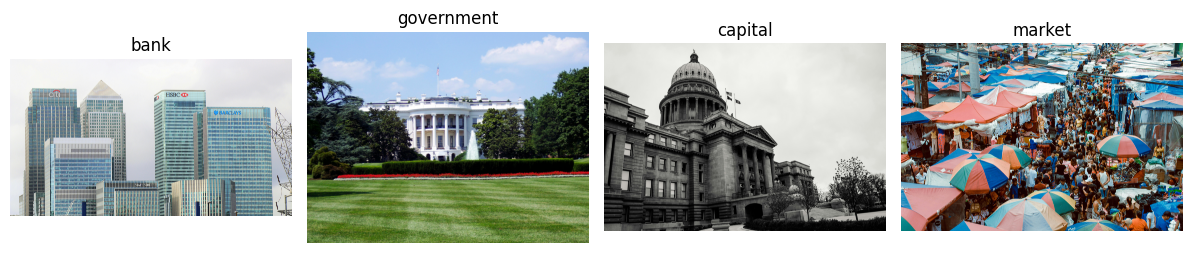

In [49]:
show_keyword_images(keywords)